### For simplification reasons in building the scoring model , there may also be a risk of overtraining the model. I use test datasets and training dat

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
xtrain=pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/application_train.csv')

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [5]:
print(xtrain.isna().sum())

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [6]:
PourcentxtrainNaN=((xtrain.isna().sum()*100)/len(xtrain))

In [7]:
columns_Train_over_50 = PourcentxtrainNaN[PourcentxtrainNaN > 40]
xtrain.drop(columns_Train_over_50.index,axis=1,inplace=True)

In [8]:
xtrain.shape

(307511, 73)

In [9]:
xtrain.dropna(inplace=True)

In [10]:
xtrain.shape

(167732, 73)

In [11]:
xtrain.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

#### xTest

In [12]:
xtest=pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/application_test.csv')

In [13]:
xtest.shape

(48744, 121)

In [14]:
print(xtest.duplicated(subset=['SK_ID_CURR']).sum())

0


In [15]:
xtest.isna().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        24
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                   911
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32312
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [16]:
PourcentxtestNaN=((xtest.isna().sum()*100)/len(xtest))
columns_Test_over_50 = PourcentxtestNaN[PourcentxtestNaN > 40]
xtest.drop(columns_Test_over_50.index,axis=1,inplace=True)

In [17]:
xtest.dropna(inplace=True)

In [18]:
xtest.shape

(26655, 72)

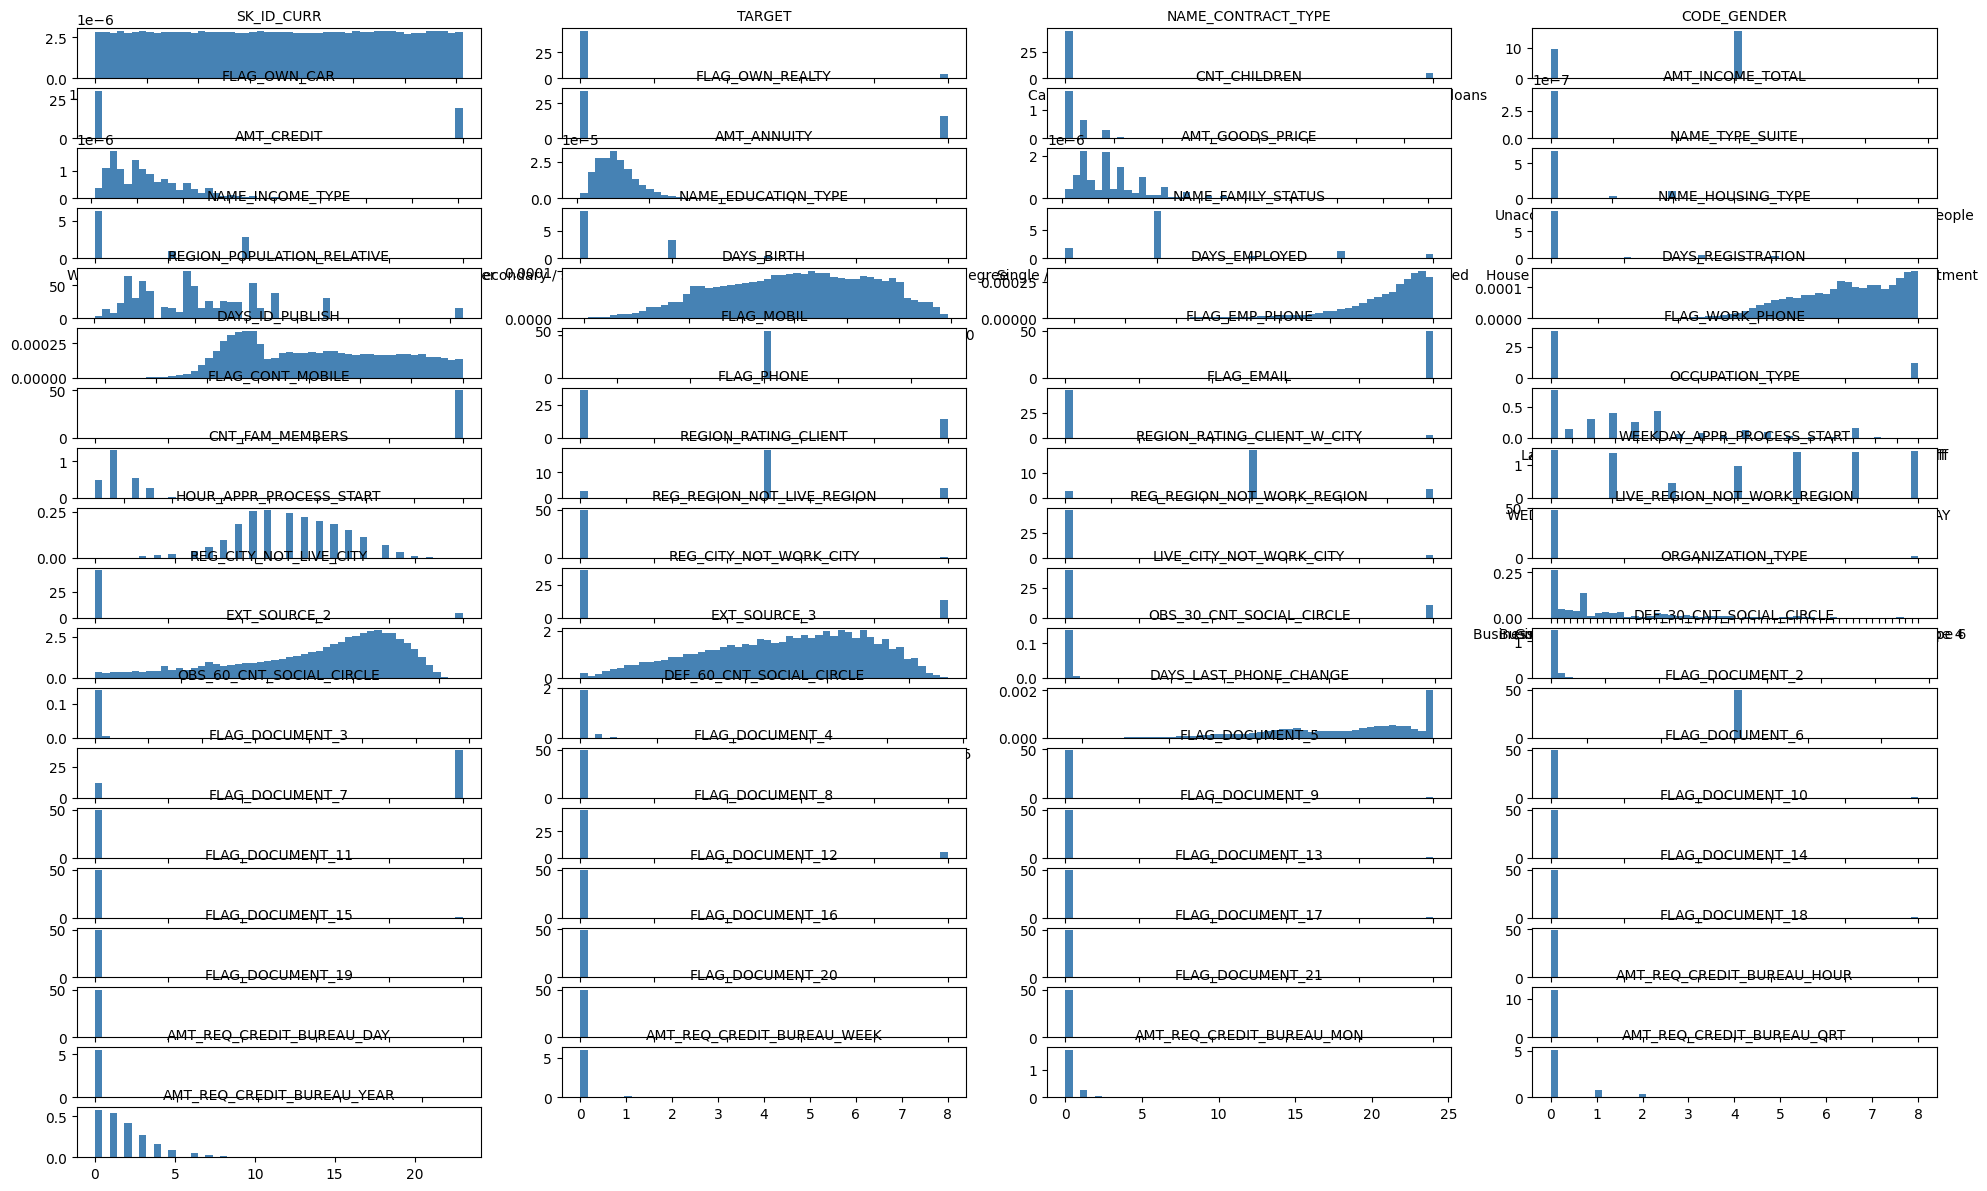

In [19]:
X = xtrain.values
y = xtrain['TARGET'].values
fig = plt.figure(figsize=(24, 24))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(31,4, (feat_idx+1))
    ax.set_title(xtrain.columns[feat_idx], fontdict={'fontsize': 10, 'fontweight': 'medium'})
    
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    

### Categorical variable encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
labelencoder=LabelEncoder()
for col in xtrain.columns:
    if xtrain[col].dtype == 'object':
        xtrain[col] = labelencoder.fit_transform(xtrain[col])

xtrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,5,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,5,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,1,0,1,0,99000.0,490495.5,27517.5,454500.0,5,3,4,1,1,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,8,2.0,2,2,6,16,0,0,0,0,0,0,33,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,0,0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,6,1,1,1,1,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,0,3.0,2,2,3,16,0,0,0,0,0,0,5,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,0,1,1,1,0,360000.0,1530000.0,42075.0,1530000.0,6,3,1,1,1,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,10,2.0,3,3,1,16,0,0,0,0,1,1,33,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
labelencoder=LabelEncoder()
for col in xtest.columns:
    if xtest[col].dtype == 'object':
        xtest[col] = labelencoder.fit_transform(xtest[col])

xtest.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,2,4,1,1,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,9,2.0,2,2,0,9,0,0,0,0,0,0,42,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,2,4,1,1,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,14,4.0,2,2,6,11,0,0,0,0,0,0,5,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
5,100042,0,0,1,1,0,270000.0,959688.0,34600.5,810000.0,6,1,4,1,1,0.025164,-18604,-12009,-6116.0,-2027,1,1,0,1,1,0,4,2.0,2,2,1,15,0,0,0,0,0,0,11,0.628904,0.392774,0.0,0.0,0.0,0.0,-1705.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,0,1,1,1,2,180000.0,499221.0,22117.5,373500.0,6,2,1,1,1,0.022800,-16685,-2580,-10125.0,-241,1,1,0,1,0,0,6,4.0,2,2,4,9,0,0,0,0,1,1,26,0.571084,0.651260,1.0,0.0,1.0,0.0,-1182.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,0,1,0,1,0,166500.0,180000.0,14220.0,180000.0,6,2,1,3,5,0.005144,-9516,-1387,-5063.0,-2055,1,1,1,1,1,0,3,1.0,2,2,0,7,0,0,0,0,0,0,42,0.613033,0.312365,0.0,0.0,0.0,0.0,-1182.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


### Normalize numerical data with IQR to avoid large computations (RobustScaler)

We normalized with IQR for the simple reason that we did not remove the outliers.

In [23]:
def iqr_normalisation_pandas(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Éviter division par zéro
    IQR = IQR.replace(0, 1)
    
    return (df - Q1) / IQR

xtrain_normalized = iqr_normalisation_pandas(xtrain)

In [24]:
xtrain_normalized.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.497838,1.0,0.0,1.0,0.0,1.0,0.0,0.80,0.221692,0.404146,0.227723,0.0,1.0,1.0,2.0,0.0,0.471405,1.446023,1.068273,0.646334,0.799314,0.0,0.0,0.0,0.0,1.0,0.0,0.666667,-1.0,0.0,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.553168,-0.725206,1.0,2.0,1.0,2.0,0.372817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
2,-0.497827,0.0,1.0,1.0,1.0,1.0,0.0,-0.40,-0.271043,-0.568780,-0.247525,0.0,1.0,1.0,2.0,0.0,0.001394,-0.255859,1.233735,0.526686,0.642578,0.0,0.0,1.0,0.0,1.0,0.0,0.666667,-1.0,0.0,0.0,0.00,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.162162,0.579166,1.238886,0.0,0.0,0.0,0.0,0.615034,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,-0.497804,0.0,0.0,1.0,0.0,1.0,0.0,-0.12,0.373900,0.556829,0.455446,-1.0,0.5,1.0,0.0,0.0,1.382109,0.117898,0.686345,0.387879,1.425875,0.0,0.0,1.0,0.0,1.0,0.0,0.666667,0.0,0.0,0.0,1.25,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.756757,-0.200376,0.878341,0.0,0.0,0.0,0.0,-0.691724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333
6,-0.497799,0.0,0.0,0.0,1.0,1.0,1.0,0.52,2.315520,1.303902,2.524752,0.0,0.0,0.0,0.0,0.0,1.382109,0.679510,0.067068,1.122385,1.371723,0.0,0.0,0.0,0.0,1.0,0.0,-0.666667,1.0,0.0,0.0,0.50,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.228842,0.448489,0.5,0.0,0.5,0.0,0.047836,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.666667
7,-0.497793,0.0,0.0,1.0,1.0,1.0,0.0,2.20,2.259776,1.345854,2.821782,0.0,0.5,0.0,0.0,0.0,-0.368977,-0.221058,1.143775,0.460802,0.700543,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,1.0,1.0,0.00,1.2,0.0,0.0,0.0,0.0,1.0,1.0,0.756757,1.191271,0.610206,1.0,0.0,1.0,0.0,0.421412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


### The distribution of Target to properly choose the type of cross-validation 

In [25]:
def analyze_target_distribution_pandas(y):
    distribution = pd.Series(y).value_counts()
    percentages = distribution / len(y) * 100
    
    print("Distribution des classes:")
    for classe in distribution.index:
        print(f"Classe {classe}: {distribution[classe]} échantillons ({percentages[classe]:.2f}%)")
        
    if min(percentages) < 30:
        print("\nAttention: Les données sont déséquilibrées!")

analyze_target_distribution_pandas(xtrain['TARGET'])

Distribution des classes:
Classe 0: 153525 échantillons (91.53%)
Classe 1: 14207 échantillons (8.47%)

Attention: Les données sont déséquilibrées!


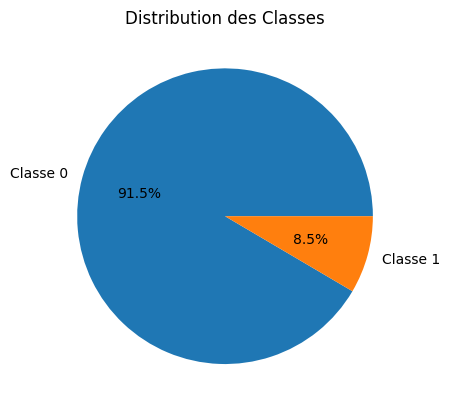

In [26]:
values, counts = np.unique(xtrain['TARGET'], return_counts=True)
plt.pie(counts, labels=['Classe 0', 'Classe 1'], autopct='%1.1f%%')
plt.title('Distribution des Classes')
plt.show()

### Implementation of a KNN model before feature engineering

In [27]:
X = xtrain_normalized.drop('TARGET', axis=1) 
y = xtrain_normalized['TARGET']    

Accuracy du modèle avant Feature Engineering : 0.9065


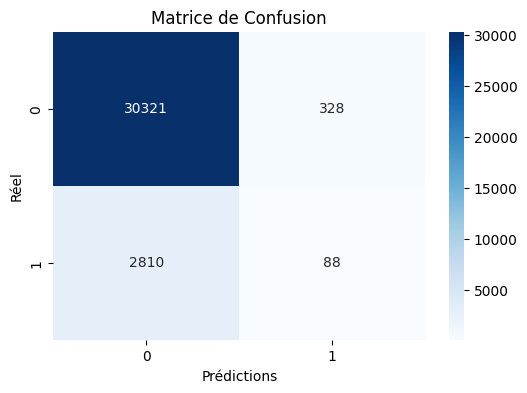

Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     30649
         1.0       0.21      0.03      0.05      2898

    accuracy                           0.91     33547
   macro avg       0.56      0.51      0.50     33547
weighted avg       0.85      0.91      0.87     33547



In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=KNeighborsClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy du modèle avant Feature Engineering : {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()

print("Rapport de classification :")
print(classification_report(y_test, y_pred))

In [29]:
model.score(X,y)

0.9168375742255502

## Feature Engeniring 

### Feature Extraction 

#### ACP

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a dataset with multiple correlated variables into a new set of independent variables called principal components.

Before applying dimensionality reduction, it is often preferable to select the appropriate columns.

In [33]:
data_pca = xtrain_normalized[["TARGET","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_BIRTH","EXT_SOURCE_2"]]

In [36]:
print('Tableau data PCA')
Xpca = data_pca.values
Xpca

Tableau data PCA


array([[ 1.        ,  0.8       ,  0.22169157, ...,  0.22772277,
         1.44602273, -0.55316768],
       [ 0.        , -0.4       , -0.27104253, ..., -0.24752475,
        -0.25585938,  0.57916605],
       [ 0.        , -0.12      ,  0.37389991, ...,  0.45544554,
         0.11789773, -0.20037611],
       ...,
       [ 0.        ,  0.36      ,  0.71346232, ...,  0.74257426,
         0.46857244,  0.50112836],
       [ 1.        ,  0.52      ,  0.15549024, ...,  0.15841584,
         1.00213068,  0.4178009 ],
       [ 0.        ,  0.4       ,  0.70862928, ...,  0.94059406,
         0.13299006,  1.16920018]])

In [35]:
#Xpca_scaled = preprocessing.StandardScaler().fit_transform(Xpca)

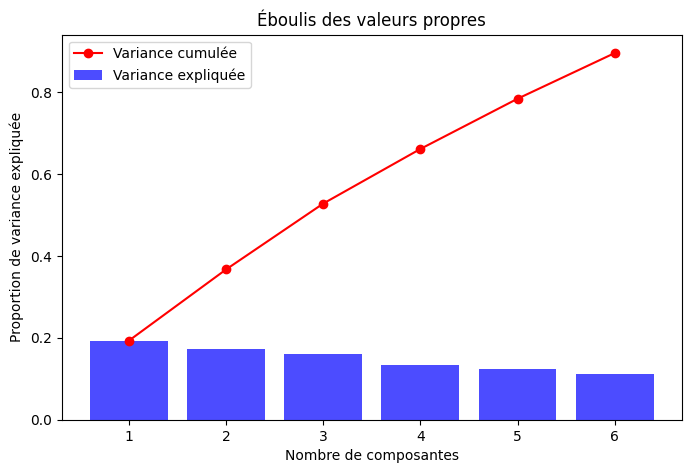

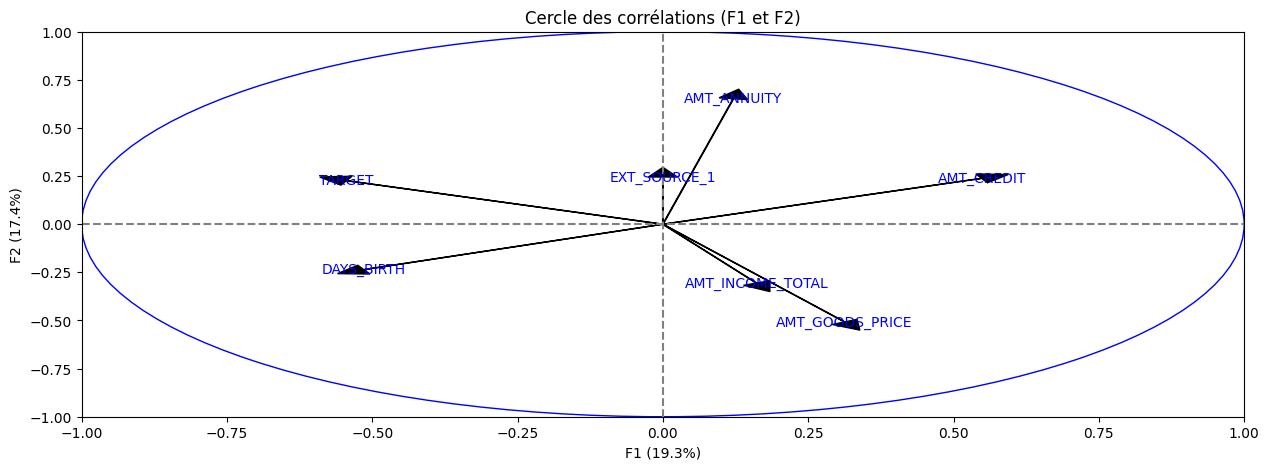

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition, preprocessing

# --- 1. Charger les données (Remplace par tes vraies données) ---
data_pca = pd.DataFrame({
    'AMT_INCOME_TOTAL': np.random.rand(100),
    'AMT_CREDIT': np.random.rand(100),
    'AMT_ANNUITY': np.random.rand(100),
    'AMT_GOODS_PRICE': np.random.rand(100),
    'DAYS_BIRTH': np.random.rand(100),
    'EXT_SOURCE_1': np.random.rand(100),
    'TARGET': np.random.rand(100)
})

# --- 2. Préparation des données ---
n_comp = 6  # Nombre de composantes à calculer
features = data_pca.columns  # Noms des variables

# Suppression des valeurs manquantes (si nécessaire)
data_pca = data_pca.fillna(data_pca.mean())

# Centrage et réduction des données
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(data_pca)

# --- 3. Calcul de l'ACP ---
pca = decomposition.PCA(n_components=n_comp)
X_pca = pca.fit_transform(X_scaled)

# --- 4. Fonction pour afficher l'éboulis des valeurs propres ---
def display_scree_plot(pca):
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, color="blue", label="Variance expliquée")
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', color="red", label="Variance cumulée")
    plt.xlabel("Nombre de composantes")
    plt.ylabel("Proportion de variance expliquée")
    plt.title("Éboulis des valeurs propres")
    plt.legend()
    plt.show()

def display_circles(pcs, n_comp, pca, axes, labels):
    fig, ax_list = plt.subplots(1, len(axes), figsize=(15, 5))

    # Si len(axes) == 1, ax_list est un seul objet et non une liste
    if len(axes) == 1:
        ax_list = [ax_list]

    for i, (d1, d2) in enumerate(axes):
        ax = ax_list[i]  # Correction ici
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)

        # Cercle unité
        circle = plt.Circle((0, 0), 1, color='blue', fill=False)
        ax.add_artist(circle)

        # Flèches des variables
        for j in range(pcs.shape[1]):
            ax.arrow(0, 0, pcs[d1, j], pcs[d2, j], head_width=0.05, head_length=0.05, color='black')
            ax.text(pcs[d1, j], pcs[d2, j], labels[j], color='blue', ha='center', va='center')

        ax.axhline(0, color='gray', linestyle='--')
        ax.axvline(0, color='gray', linestyle='--')
        ax.set_xlabel(f"F{d1+1} ({round(pca.explained_variance_ratio_[d1] * 100, 1)}%)")
        ax.set_ylabel(f"F{d2+1} ({round(pca.explained_variance_ratio_[d2] * 100, 1)}%)")
        ax.set_title(f"Cercle des corrélations (F{d1+1} et F{d2+1})")

    plt.show()


# --- 6. Affichage des résultats ---
display_scree_plot(pca)
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels=np.array(features))


In [29]:
xtrain_normalized.var()

SK_ID_CURR                     0.332026
TARGET                         0.077527
NAME_CONTRACT_TYPE             0.087505
CODE_GENDER                    0.235993
FLAG_OWN_CAR                   0.238081
FLAG_OWN_REALTY                0.218261
CNT_CHILDREN                   0.592080
AMT_INCOME_TOTAL               7.318187
AMT_CREDIT                     0.548010
AMT_ANNUITY                    0.614334
AMT_GOODS_PRICE                0.678439
NAME_TYPE_SUITE                3.013439
NAME_INCOME_TYPE               0.195998
NAME_EDUCATION_TYPE            0.197371
NAME_FAMILY_STATUS             0.865902
NAME_HOUSING_TYPE              1.004191
REGION_POPULATION_RELATIVE     0.523913
DAYS_BIRTH                     0.407382
DAYS_EMPLOYED                  0.923952
DAYS_REGISTRATION              0.403052
DAYS_ID_PUBLISH                0.327629
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000042
FLAG_WORK_PHONE                0.183793
FLAG_CONT_MOBILE               0.002266


Removal of less relevant variables and those with low variance.

In [30]:
xtrain_normalized.drop(['FLAG_MOBIL','FLAG_DOCUMENT_2','FLAG_EMP_PHONE','FLAG_DOCUMENT_4' ,'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_10' ,'FLAG_DOCUMENT_12' ,'FLAG_DOCUMENT_17' ,'FLAG_DOCUMENT_21'],axis =1 ,inplace=True)

In [31]:
xtrain_normalized.shape

(167732, 64)

Check the correlations of the dataset based on the TARGET.

In [32]:
correlation = xtrain_normalized.corr()

correlations_with_target = correlation['TARGET'].sort_values(ascending=False)

print("Corrélations positives les plus fortes avec TARGET:")
print(correlations_with_target[1:15])  # On exclut TARGET elle-même (corrélation=1)

print("\nCorrélations négatives les plus fortes avec TARGET:")
print(correlations_with_target[-15:])

Corrélations positives les plus fortes avec TARGET:
DAYS_EMPLOYED                  0.076579
DAYS_BIRTH                     0.067406
NAME_EDUCATION_TYPE            0.062345
REGION_RATING_CLIENT_W_CITY    0.061878
REGION_RATING_CLIENT           0.059225
DAYS_LAST_PHONE_CHANGE         0.057367
CODE_GENDER                    0.044316
REG_CITY_NOT_WORK_CITY         0.042129
REG_CITY_NOT_LIVE_CITY         0.041658
FLAG_DOCUMENT_3                0.040980
DAYS_ID_PUBLISH                0.037501
DAYS_REGISTRATION              0.036761
NAME_INCOME_TYPE               0.032771
DEF_30_CNT_SOCIAL_CIRCLE       0.032085
Name: TARGET, dtype: float64

Corrélations négatives les plus fortes avec TARGET:
FLAG_DOCUMENT_14             -0.009912
FLAG_DOCUMENT_13             -0.013227
FLAG_DOCUMENT_8              -0.013820
FLAG_DOCUMENT_16             -0.013943
AMT_REQ_CREDIT_BUREAU_MON    -0.016080
AMT_ANNUITY                  -0.018550
HOUR_APPR_PROCESS_START      -0.025009
FLAG_PHONE                   -0.0

In [33]:
Var_cor=xtrain_normalized[['DAYS_EMPLOYED' ,'DAYS_BIRTH', 'NAME_EDUCATION_TYPE',    'REGION_RATING_CLIENT_W_CITY',   'REGION_RATING_CLIENT',   'DAYS_LAST_PHONE_CHANGE'   , 'CODE_GENDER'  ,  'REG_CITY_NOT_WORK_CITY' ,  'REG_CITY_NOT_LIVE_CITY'  ,  'FLAG_DOCUMENT_3'   , 'DAYS_ID_PUBLISH' ,'DAYS_REGISTRATION' , 'NAME_INCOME_TYPE' ,  'DEF_30_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_14'   ,'FLAG_DOCUMENT_13',   'FLAG_DOCUMENT_8' ,   'FLAG_DOCUMENT_16' ,   'AMT_REQ_CREDIT_BUREAU_MON' ,   'AMT_ANNUITY', 'HOUR_APPR_PROCESS_START'    ,  'FLAG_PHONE' ,  'FLAG_OWN_CAR' ,  'NAME_CONTRACT_TYPE' ,   'REGION_POPULATION_RELATIVE'  , 'AMT_CREDIT'   ,    'AMT_GOODS_PRICE'     ,   'EXT_SOURCE_2'   ,   'EXT_SOURCE_3']]

In [34]:
Var_cor.shape

(167732, 29)

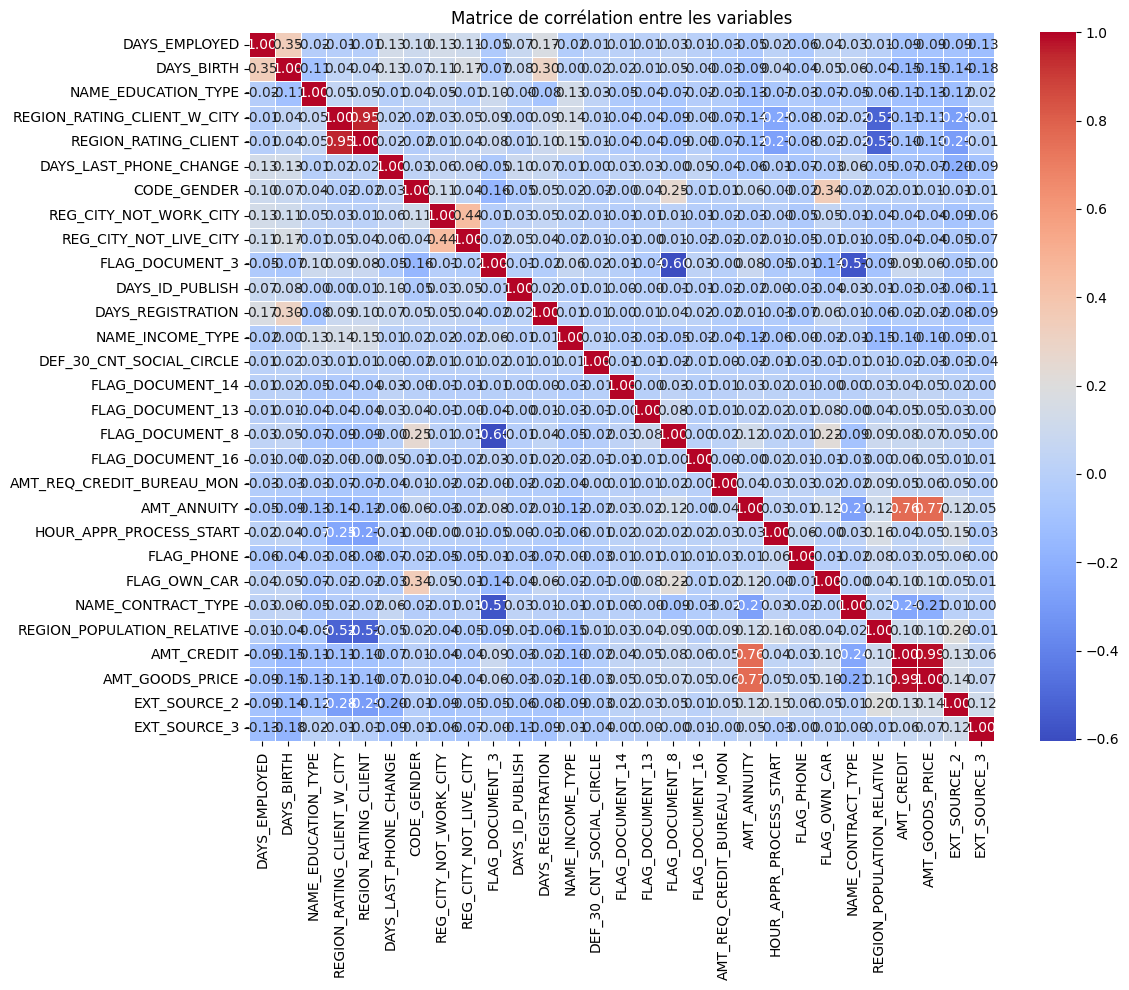

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = Var_cor.corr()

# Créer la visualisation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,        
            fmt='.2f',         
            cmap='coolwarm',   
            linewidths=0.5)    

plt.title('Matrice de corrélation entre les variables')
plt.tight_layout()
plt.show()

In [36]:
Var_cor.drop(['REGION_RATING_CLIENT_W_CITY','AMT_GOODS_PRICE'],axis=1,inplace=True)

C:\Users\huawie\AppData\Local\Temp\ipykernel_14864\746922208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Var_cor.drop(['REGION_RATING_CLIENT_W_CITY','AMT_GOODS_PRICE'],axis=1,inplace=True)


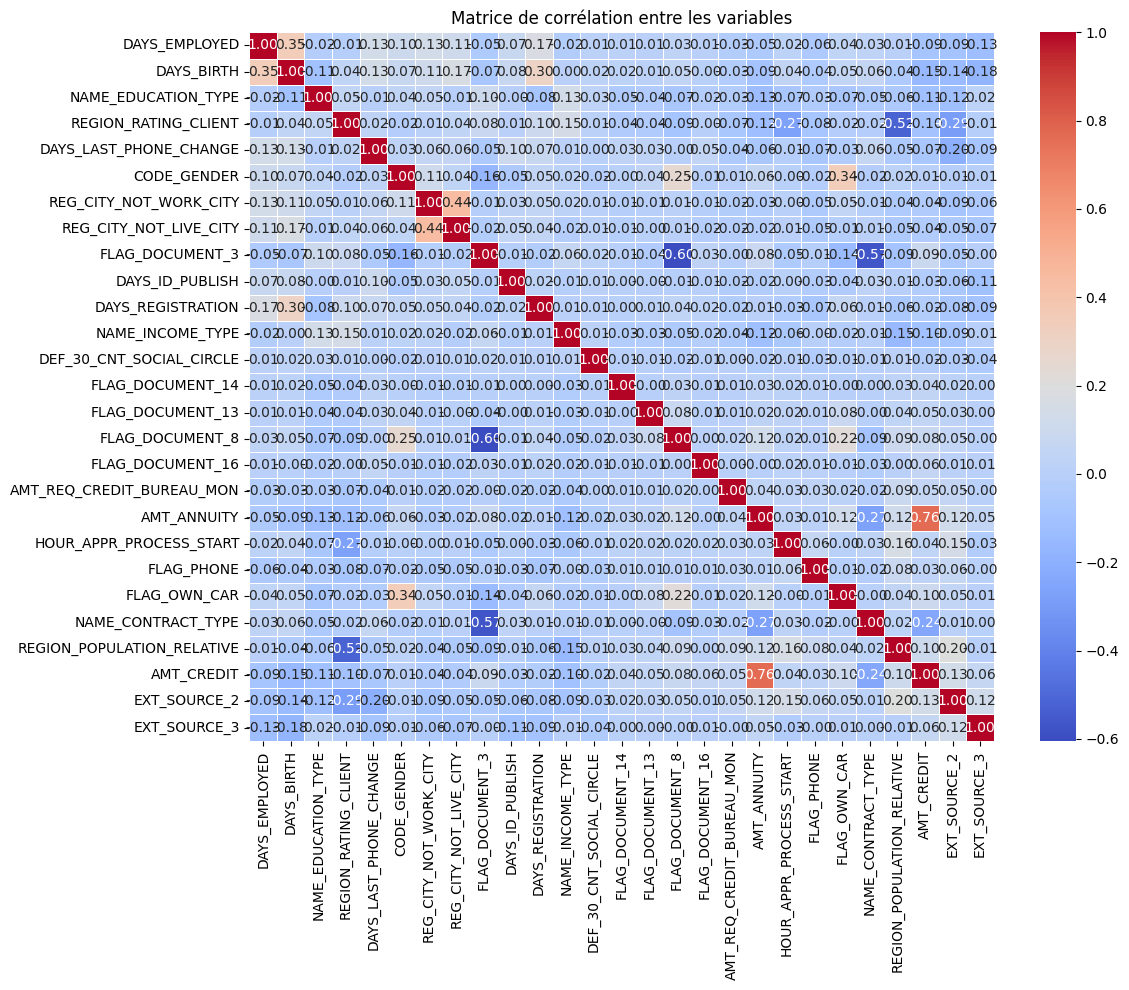

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = Var_cor.corr()

# Créer la visualisation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,        
            fmt='.2f',         
            cmap='coolwarm',   
            linewidths=0.5)    

plt.title('Matrice de corrélation entre les variables')
plt.tight_layout()
plt.show()

### Feature  selection  (ANOVA) 

Top 40 features selon ANOVA:
                       Feature        Score        P-value
26                EXT_SOURCE_3  5654.005190   0.000000e+00
25                EXT_SOURCE_2  4710.830886   0.000000e+00
0                DAYS_EMPLOYED   989.435316  1.524620e-216
1                   DAYS_BIRTH   765.563151  3.968962e-168
2          NAME_EDUCATION_TYPE   654.495655  4.454625e-144
3         REGION_RATING_CLIENT   590.406185  3.438998e-130
4       DAYS_LAST_PHONE_CHANGE   553.824404  2.929920e-122
5                  CODE_GENDER   330.048454   1.104284e-73
6       REG_CITY_NOT_WORK_CITY   298.224385   9.172957e-67
7       REG_CITY_NOT_LIVE_CITY   291.576167   2.561369e-65
8              FLAG_DOCUMENT_3   282.152885   2.872704e-63
24                  AMT_CREDIT   242.653774   1.133622e-54
9              DAYS_ID_PUBLISH   236.210245   2.867189e-53
10           DAYS_REGISTRATION   226.978073   2.937683e-51
23  REGION_POPULATION_RELATIVE   221.141108   5.487760e-50
22          NAME_CONTRACT_T

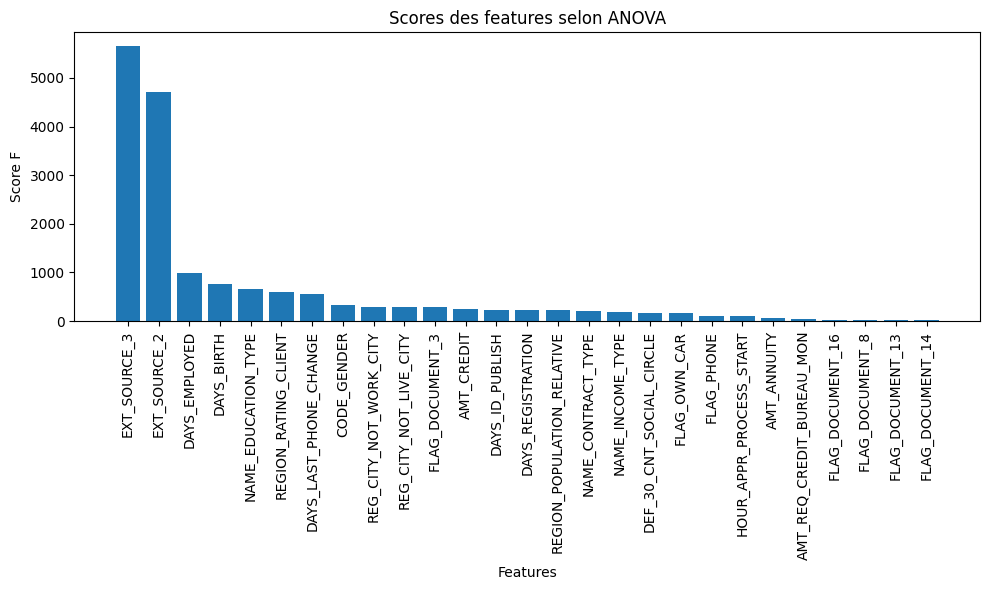

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif

def select_features_anova(X, y, k=10):
    
    # Appliquer le test ANOVA (f_classif pour la classification)
    selector = SelectKBest(score_func=f_classif, k=min(k, X.shape[1]))
    selector.fit(X, y)
    
    # Récupérer les indices des features sélectionnées
    selected_indices = selector.get_support(indices=True)
    selected_features = list(X.columns[selected_indices])
    
    # Créer un DataFrame des scores pour chaque feature
    scores = pd.DataFrame({
        'Feature': X.columns,
        'Score': selector.scores_,
        'P-value': selector.pvalues_
    })
    
    # Trier par score décroissant
    scores = scores.sort_values('Score', ascending=False)
    
    # Afficher les résultats
    print("Top", k, "features selon ANOVA:")
    print(scores.head(k))
    
    # Visualiser les scores
    plt.figure(figsize=(10, 6))
    plt.bar(scores['Feature'].head(k), scores['Score'].head(k))
    plt.xticks(rotation=90)
    plt.title('Scores des features selon ANOVA')
    plt.xlabel('Features')
    plt.ylabel('Score F')
    plt.tight_layout()
    plt.show()
    
    # Retourner le DataFrame avec les features sélectionnées
    return X.iloc[:, selected_indices], selected_features

X_train_selected, selected_features = select_features_anova(Var_cor, y, k=40)


In [39]:
Var_cor.drop(['FLAG_DOCUMENT_16','FLAG_DOCUMENT_8','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','DAYS_REGISTRATION','REGION_POPULATION_RELATIVE','NAME_CONTRACT_TYPE','NAME_INCOME_TYPE','DEF_30_CNT_SOCIAL_CIRCLE','FLAG_OWN_CAR'],axis=1,inplace=True)

C:\Users\huawie\AppData\Local\Temp\ipykernel_14864\3909904676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Var_cor.drop(['FLAG_DOCUMENT_16','FLAG_DOCUMENT_8','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','DAYS_REGISTRATION','REGION_POPULATION_RELATIVE','NAME_CONTRACT_TYPE','NAME_INCOME_TYPE','DEF_30_CNT_SOCIAL_CIRCLE','FLAG_OWN_CAR'],axis=1,inplace=True)


In [40]:
Var_cor.shape

(167732, 17)

### entrainement de model apres le feature engeniring 

Accuracy du modèle avant Feature Engineering : 0.9055


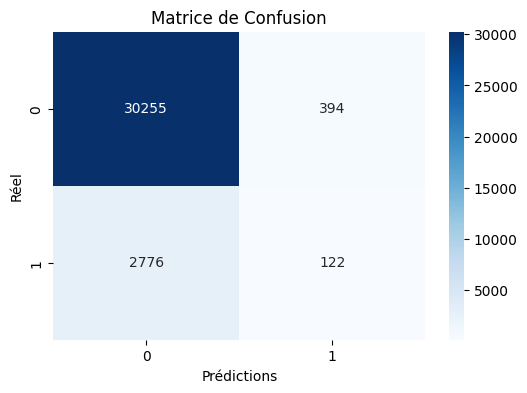

Rapport de classification :
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     30649
           1       0.24      0.04      0.07      2898

    accuracy                           0.91     33547
   macro avg       0.58      0.51      0.51     33547
weighted avg       0.86      0.91      0.87     33547



In [41]:
X = Var_cor 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=KNeighborsClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy du modèle avant Feature Engineering : {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()

print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Scores de validation croisée: [0.91587921 0.91313679 0.91689024 0.91608538 0.91450546]
Score moyen: 0.9153


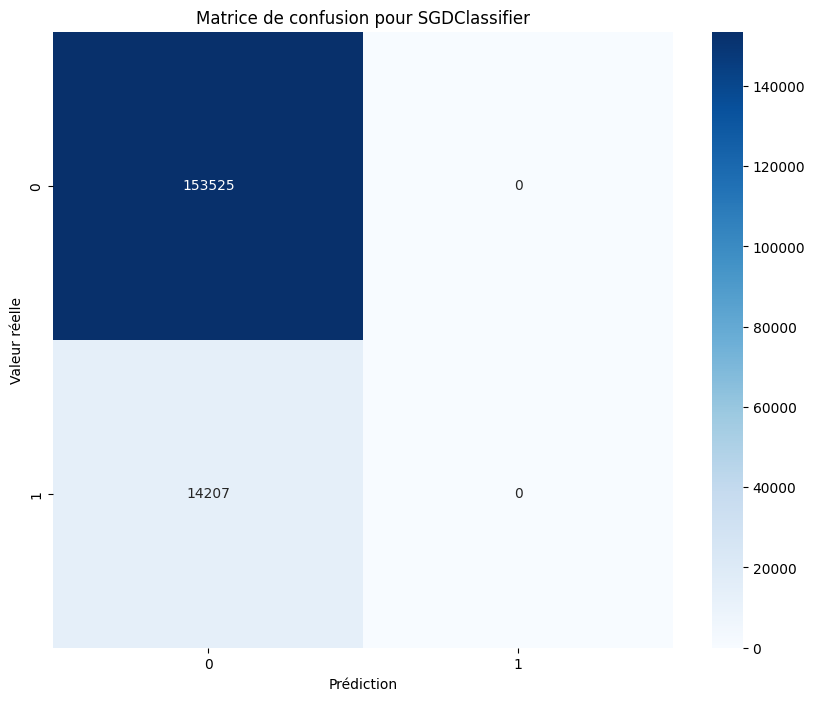

In [42]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
# Créer les objets KFold et SGDClassifier
cv = KFold(n_splits=5, shuffle=True, random_state=0)
sgd_clf = SGDClassifier(random_state=0)
X=Var_cor
y=xtrain['TARGET']
# Effectuer la validation croisée
scores = cross_val_score(sgd_clf, X, y, cv=cv)
# Afficher les résultats
print(f"Scores de validation croisée: {scores}")
print(f"Score moyen: {scores.mean():.4f}")
y_pred2 = cross_val_predict(sgd_clf, X, y, cv=cv)
cm = confusion_matrix(y, y_pred2)
plt.figure(figsize=(10, 8))
# Créer la heatmap pour la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), 
            yticklabels=np.unique(y))
plt.title('Matrice de confusion pour SGDClassifier')
plt.ylabel('Valeur réelle')
plt.xlabel('Prédiction')
plt.show()

In [50]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 3.3 MB/s eta 0:00:38
   ---------------------------------------- 1.3/124.9 MB 3.4 MB/s eta 0:00:37
    --------------------------------------- 1.8/124.9 MB 3.1 MB/s eta 0:00:40
    --------------------------------------- 2.6/124.9 MB 3.0 MB/s eta 0:00:41
   - -------------------------------------- 3.4/124.9 MB 3.1 MB/s eta 0:00:39
   - -------------------------------------- 4.2/124.9 MB 3.3 MB/s eta 0:00:37
   - -------------------------------------- 5.0/124.9 MB 3.4 MB/s eta 0:00:36
   - -------------------------------------- 6.0/124.9 MB 3.5 MB/s eta 0:00:34
   -- ------------------------------------- 6.3/124.9 MB 3.4 MB/s eta 0:00:36
   -- ------------------------------------- 6.3/124.9 MB 3.4 MB/s eta 0:00:36



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Accuracy: 0.9138


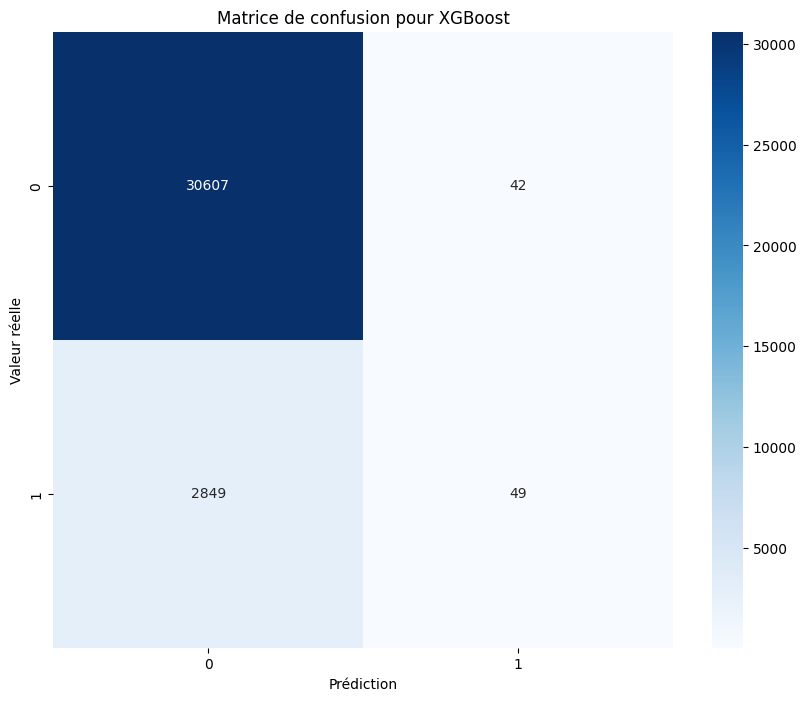

In [53]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Division des données en ensembles d'entraînement et de test 
# (à ajouter si ce n'est pas déjà fait ailleurs)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle XGBoost
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred3 = model.predict(X_test)

# Évaluation
accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy:.4f}")

# Création de la matrice de confusion
# CORRECTION: Utiliser y_test au lieu de y pour la matrice de confusion
cm1 = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(10, 8))
# Créer la heatmap pour la matrice de confusion
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))

# CORRECTION: Modifier le titre pour refléter l'utilisation de XGBoost
plt.title('Matrice de confusion pour XGBoost')
plt.ylabel('Valeur réelle')
plt.xlabel('Prédiction')
plt.show()

### SVC

In [43]:
'''from sklearn.svm import SVC
svc = SVC(kernel='rbf', probability=True, random_state=42)
svc.fit(Var_cor, y)

# 5. Faire des prédictions
y_pred = svc.predict(X_test_scaled)
y_prob = svc.predict_proba(X_test_scaled)  # Probabilités pour chaque classe

# 6. Évaluer le modèle
print("Précision du modèle:", accuracy_score(y_test, y_pred))
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

# 7. Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.show()

# 8. Optimisation des hyperparamètres (optionnel)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("\nMeilleurs paramètres:", grid_search.best_params_)
best_svc = grid_search.best_estimator_

# 9. Évaluer le modèle optimisé
y_pred_best = best_svc.predict(X_test_scaled)
print("\nPrécision du modèle optimisé:", accuracy_score(y_test, y_pred_best))
print("\nRapport de classification (modèle optimisé):")
print(classification_report(y_test, y_pred_best))'''

'from sklearn.svm import SVC\nsvc = SVC(kernel=\'rbf\', probability=True, random_state=42)\nsvc.fit(Var_cor, y)\n\n# 5. Faire des prédictions\ny_pred = svc.predict(X_test_scaled)\ny_prob = svc.predict_proba(X_test_scaled)  # Probabilités pour chaque classe\n\n# 6. Évaluer le modèle\nprint("Précision du modèle:", accuracy_score(y_test, y_pred))\nprint("\nRapport de classification:")\nprint(classification_report(y_test, y_pred))\n\n# 7. Afficher la matrice de confusion\nplt.figure(figsize=(8, 6))\ncm = confusion_matrix(y_test, y_pred)\nsns.heatmap(cm, annot=True, fmt=\'d\', cmap=\'Blues\')\nplt.title(\'Matrice de confusion\')\nplt.xlabel(\'Prédictions\')\nplt.ylabel(\'Valeurs réelles\')\nplt.show()\n\n# 8. Optimisation des hyperparamètres (optionnel)\nparam_grid = {\n    \'C\': [0.1, 1, 10, 100],\n    \'gamma\': [\'scale\', \'auto\', 0.1, 0.01, 0.001],\n    \'kernel\': [\'rbf\', \'linear\', \'poly\']\n}\n\ngrid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring=\'accu

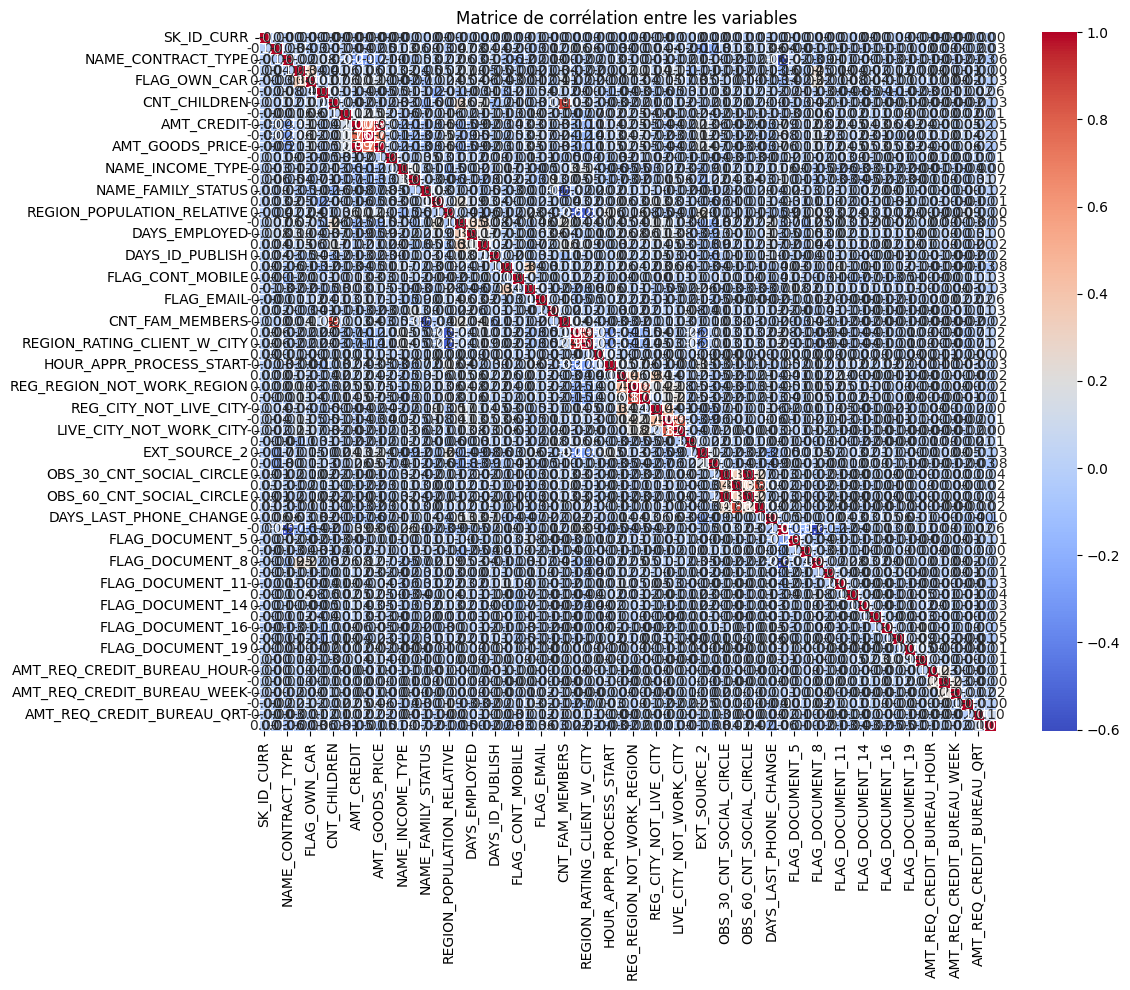

In [44]:
corr_matrix = xtrain_normalized.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,        # Affiche les valeurs
            fmt='.2f',         # Format avec 2 décimales
            cmap='coolwarm',   # Palette de couleurs
            linewidths=0.5)    # Lignes entre les cellules

plt.title('Matrice de corrélation entre les variables')
plt.tight_layout()
plt.show()

In [45]:
# Pour séparer les colonnes numériques et catégorielles
colonnes_numeriques = xtrain.select_dtypes(include=['int64', 'float64']).columns
colonnes_categorielles = xtrain.select_dtypes(include=['object', 'category']).columns

In [46]:
print(colonnes_numeriques.tolist())
print("----------------------",colonnes_categorielles.tolist())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FL

In [47]:
from sklearn.feature_selection import chi2, SelectKBest
selector=SelectKBest(chi2,k=20)
selector.fit_transform(X_scaled,y)
selector.get_support()
#chi2(X_scaled,y)

NameError: name 'X_scaled' is not defined

In [ ]:
array=model.predict(xtest)
print(array.tolist())

In [ ]:
correlation_matrix = xtrain.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()